In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import Thermobar as pt
from pickle import load
import pickle

## First, lets load Cpx data

In [2]:
with open(r'../Combo_Cpx.pkl', 'rb') as f:
            All_Cpx=load(f)
Shasta_Cpx=All_Cpx.loc[All_Cpx['Volcano']=="Shasta"]
Shasta_Cpx['Sample_ID_Cpx']="Shasta"


WangCopy=Shasta_Cpx.copy()
WangCopy['Preferred_P']=WangCopy['P_Wang21_eq1']
WangCopy['Model']="Wang"
JorgensonCopy=Shasta_Cpx.copy()
JorgensonCopy['Preferred_P']=JorgensonCopy['P_Jorgenson22']
JorgensonCopy['Model']="Jorgenson"

Combo_Cpx=pd.concat([WangCopy, JorgensonCopy], axis=0)



C:\Users\penny\AppData\Local\Temp\ipykernel_25188\659385994.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Shasta_Cpx['Sample_ID_Cpx']="Shasta"


In [3]:
Combo_Cpx.to_clipboard(excel=True)

In [4]:
len(WangCopy)

328

In [5]:
len(JorgensonCopy)

328

In [6]:
np.shape(Combo_Cpx)

(656, 46)

## Choose Crustal density

In [7]:
rho=2700
P_axis_min=-3
P_axis_max=12
D_axis_min=100000*P_axis_min/(9.8*rho)
D_axis_max=100000*P_axis_max/(9.8*rho)


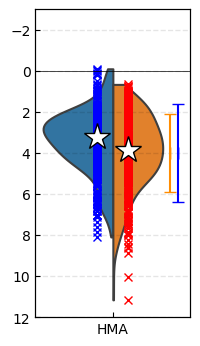

In [23]:
import seaborn as sns
fig, (ax1) = plt.subplots(1, 1, figsize=(2,4), sharey=True)
ax2 = ax1.twinx()
# ticks = [40.540139,41.3099, 41.6108, 42.9446, 43.7221, 44.103449, 44.6743, 45.3736, 46.1914, 46.8523, 48.1119, 48.7767]
# labels = ['Shasta', 'Shasta', 'Med Lake', 'Crater Lake', 'Newberry', '3 Sisters', 'Mt. Jeff', 'Mt. Hood', 'MSH', 'Rainier', 'Glac. Pk.', 'Mt. Baker']
# ax2.set_xticks(ticks, minor=False)
# ax2.set_xticklabels(labels, fontdict=None, minor=False, rotation=90)
#ax1.set_xlim([40, 49])
volc_order=[ "HMA", "Main Edifice", "Domefield"]
sns.violinplot(x="Stage", y="Preferred_P",  cut=0,  inner=None, hue="Model",
            data=Combo_Cpx, split=True, ax=ax1, width=0.9, order=volc_order, stick=True)

ax1.plot(-0.1+0*Combo_Cpx['Preferred_P'].loc[(Combo_Cpx['Model']=="Wang")
                                        &(Combo_Cpx["Stage"]=="HMA")],
      Combo_Cpx['Preferred_P'].loc[(Combo_Cpx['Model']=="Wang")
                                        &(Combo_Cpx["Stage"]=="HMA")],  
         'xb')

ax1.plot(0.1+0*Combo_Cpx['Preferred_P'].loc[(Combo_Cpx['Model']=="Jorgenson")
                                        &(Combo_Cpx["Stage"]=="HMA")],
      Combo_Cpx['Preferred_P'].loc[(Combo_Cpx['Model']=="Jorgenson")
                                        &(Combo_Cpx["Stage"]=="HMA")],  
         'xr')

ax1.plot(-0.1,
      np.nanmedian(Combo_Cpx['Preferred_P'].loc[(Combo_Cpx['Model']=="Wang")
                                        &(Combo_Cpx["Stage"]=="HMA")]),  
         '*k', mfc='w', ms=20)

ax1.plot(0.1,
      np.nanmedian(Combo_Cpx['Preferred_P'].loc[(Combo_Cpx['Model']=="Jorgenson")
                                        &(Combo_Cpx["Stage"]=="HMA")]),  
         '*k', mfc='w', ms=20)




ax1.plot([-1, 5], [0, 0], '-k', lw=0.5)
ax1.set_ylim([P_axis_max, P_axis_min])
ax2.set_ylim([D_axis_max, D_axis_min])
ax1.set_xlim([-0.5, 0.5])
ax1.get_legend().remove()
ax1.set_xlabel(None)
ax1.set_ylabel(None)
ax1.tick_params(direction="in")
ax2.tick_params(direction="in")
ax1.grid(color = 'k', linestyle = '--', axis='y',linewidth = 1, alpha = 0.1, zorder=0)
ax2.set_yticks([])
ax1.errorbar(0.42, 4, xerr=0, yerr=2.4,  ecolor='blue', elinewidth=1.5, fmt='none', capsize=4, mec='k')
ax1.errorbar(0.37, 4, xerr=0, yerr=1.9,  ecolor='darkorange', elinewidth=1.5, fmt='none', capsize=4, mec='k')
fig.savefig('Shasta_Cpx.png', dpi=200)

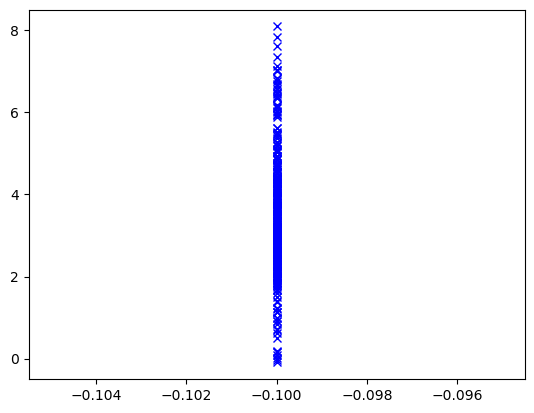

In [9]:
plt.plot(-0.1+0*Combo_Cpx['Preferred_P'].loc[(Combo_Cpx['Model']=="Wang")
                                        &(Combo_Cpx["Stage"]=="HMA")],
      Combo_Cpx['Preferred_P'].loc[(Combo_Cpx['Model']=="Wang")
                                        &(Combo_Cpx["Stage"]=="HMA")],  
         'xb')

In [10]:
len(Combo_Cpx['Preferred_P'].loc[(Combo_Cpx['Model']=="Wang")
                                        &(Combo_Cpx["Stage"]=="HMA")])

328

## Opx - Cpx Barometry

In [11]:
Shasta_read_Cpx_Opx=pt.import_excel(r'../../Stitching_Mineral_Data/Shasta.xlsx', sheet_name='Cpx_Opx_All')
Shasta_Input_Cpx_Opx=Shasta_read_Cpx_Opx['my_input']
Shasta_Cpx_pairs=Shasta_read_Cpx_Opx['Cpxs']
Shasta_Opx_pairs=Shasta_read_Cpx_Opx['Opxs']
Shasta_Cpx_pairs['Sample_ID_Cpx']=Shasta_Input_Cpx_Opx['Formation']

# Same filters as used for Cpx. 
import warnings as w
with w.catch_warnings():
    w.simplefilter('ignore')
    Shasta_cpx_comps=pt.calculate_clinopyroxene_components(cpx_comps=Shasta_Cpx_pairs)
    Shasta_opx_comps=pt.calculate_orthopyroxene_components(opx_comps=Shasta_Opx_pairs)
    
    Cat_Sum_Filt_cpx=(Shasta_cpx_comps['Cation_Sum_Cpx'].between(3.95, 4.05))
    Cat_Sum_Filt_opx=(Shasta_cpx_comps['Cation_Sum_Cpx'].between(3.95, 4.05))
    
    Ca_Filt_Opx=Shasta_opx_comps['Ca_CaMgFe'].between(-0.2, 0.06)
    Ca_Filt_Cpx=Shasta_cpx_comps['Ca_CaMgFe'].between(0.2, 0.5)
    HighMgno=Shasta_cpx_comps['Mgno_Cpx']>0.68
    
    Shasta_Cpx_pairs_Filt=Shasta_Cpx_pairs.loc[HighMgno&Ca_Filt_Opx&Ca_Filt_Cpx&Cat_Sum_Filt_cpx&Cat_Sum_Filt_opx].reset_index(drop=True)
    Shasta_Opx_pairs_Filt=Shasta_Opx_pairs.loc[HighMgno&Ca_Filt_Opx&Ca_Filt_Cpx&Cat_Sum_Filt_cpx&Cat_Sum_Filt_opx].reset_index(drop=True)
    Shasta_cpx_comps_Filt=Shasta_cpx_comps.loc[HighMgno&Ca_Filt_Opx&Ca_Filt_Cpx&Cat_Sum_Filt_cpx&Cat_Sum_Filt_opx].reset_index(drop=True)
    Shasta_all_filt=Shasta_Input_Cpx_Opx.loc[HighMgno&Ca_Filt_Opx&Ca_Filt_Cpx&Cat_Sum_Filt_cpx&Cat_Sum_Filt_opx].reset_index(drop=True)


    #More than Mg#75
    Shasta_cpx_opx_36_39=pt.calculate_cpx_opx_press_temp(cpx_comps=Shasta_Cpx_pairs_Filt, 
                                                       opx_comps=Shasta_Opx_pairs_Filt,
                                                             eq_tests=True,
                                                       equationP="P_Put2008_eq39",
                                                      equationT="T_Put2008_eq36")

    Shasta_cpx_opx_36_39['Preferred_P']=Shasta_cpx_opx_36_39.P_kbar_calc
    Shasta_cpx_opx_36_39['Model']="36-39"

    Shasta_cpx_opx_37_39=pt.calculate_cpx_opx_press_temp(cpx_comps=Shasta_Cpx_pairs_Filt, 
                                                       opx_comps=Shasta_Opx_pairs_Filt,
                                                             eq_tests=True,
                                                       equationP="P_Put2008_eq39",
                                                      equationT="T_Put2008_eq37")

    Shasta_cpx_opx_37_39['Preferred_P']=Shasta_cpx_opx_37_39.P_kbar_calc
    Shasta_cpx_opx_37_39['Model']="37-39"
    Shasta_cpx_opx_combo=pd.concat([Shasta_cpx_opx_37_39, Shasta_cpx_opx_36_39], axis=0)

g:\my drive\postdoc\pymme\mybarometers\thermobar_outer\src\Thermobar\import_export.py:362: UserWarning: You've got a column heading with a lower case _cpx, this is okay if this column is for your own use, but if its an input to Thermobar, it needs to be capitalized (_Cpx)
  w.warn("You've got a column heading with a lower case _cpx, this is okay if this column is for your"
g:\my drive\postdoc\pymme\mybarometers\thermobar_outer\src\Thermobar\import_export.py:366: UserWarning: You've got a column heading with a lower case _opx, this is okay if this column is for your own use, but if its an input to Thermobar, it needs to be capitalized (_Opx)
  w.warn("You've got a column heading with a lower case _opx, this is okay if this column is for your"


In [12]:
Shasta_all_filt.to_clipboard(excel=True)

In [13]:
Shasta_cpx_comps['Mgno_Cpx']
len(Shasta_Cpx_pairs_Filt)

116

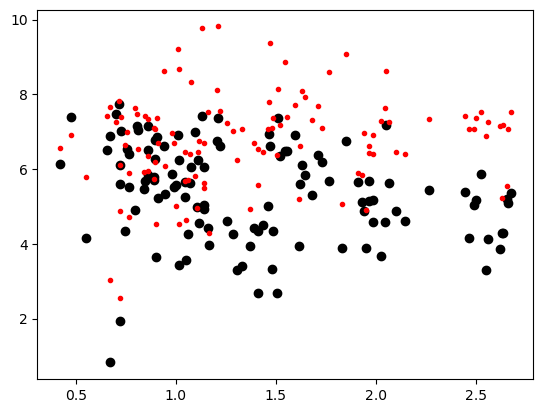

In [14]:
plt.plot(Shasta_cpx_opx_37_39['Kd_Fe_Mg_Cpx_Opx'], Shasta_cpx_opx_37_39.P_kbar_calc, 'ok')
plt.plot(Shasta_cpx_opx_36_39['Kd_Fe_Mg_Cpx_Opx'], Shasta_cpx_opx_36_39.P_kbar_calc, '.r')

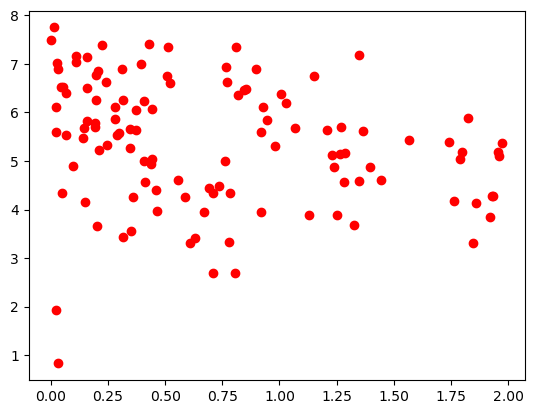

In [15]:
plt.plot(Shasta_cpx_opx_37_39['Delta Kd Low T'], Shasta_cpx_opx_37_39.P_kbar_calc, 'or')

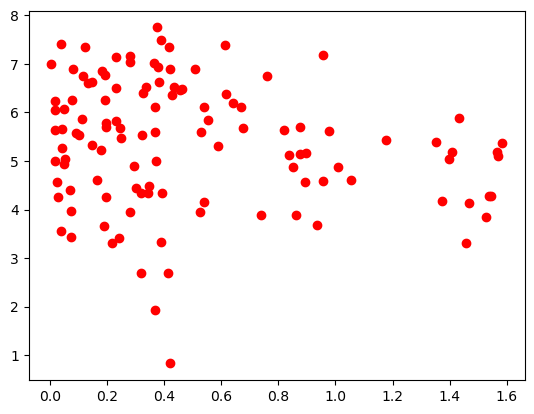

In [16]:
plt.plot(Shasta_cpx_opx_37_39['Delta Kd High T'], Shasta_cpx_opx_37_39.P_kbar_calc, 'or')

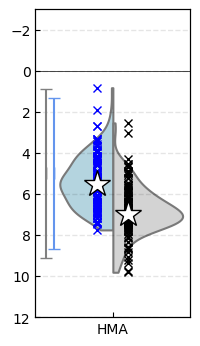

In [27]:
import seaborn as sns
fig, (ax1) = plt.subplots(1, 1, figsize=(2,4), sharey=True)
ax2 = ax1.twinx()

# ticks = [40.540139,41.3099, 41.6108, 42.9446, 43.7221, 44.103449, 44.6743, 45.3736, 46.1914, 46.8523, 48.1119, 48.7767]
# labels = ['Shasta', 'Shasta', 'Med Lake', 'Crater Lake', 'Newberry', '3 Sisters', 'Mt. Jeff', 'Mt. Hood', 'MSH', 'Rainier', 'Glac. Pk.', 'Mt. Baker']
# ax2.set_xticks(ticks, minor=False)
# ax2.set_xticklabels(labels, fontdict=None, minor=False, rotation=90)
#ax1.set_xlim([40, 49])
volc_order=[ "HMA", "Main Edifice"]
sns.violinplot(x="Sample_ID_Cpx", y="Preferred_P",  cut=0,  inner=None, hue="Model",
            data=Shasta_cpx_opx_combo, split=True, ax=ax1, width=0.9, order=volc_order, 
               stick=True, palette=['lightblue', 'lightgrey'])

ax1.plot(-0.1+0*Shasta_cpx_opx_combo['Preferred_P'].loc[(Shasta_cpx_opx_combo['Model']=="37-39")
                                        &(Shasta_cpx_opx_combo["Sample_ID_Cpx"]=="HMA")],
      Shasta_cpx_opx_combo['Preferred_P'].loc[(Shasta_cpx_opx_combo['Model']=="37-39")
                                        &(Shasta_cpx_opx_combo["Sample_ID_Cpx"]=="HMA")],  
         'xb')

ax1.plot(0.1+0*Shasta_cpx_opx_combo['Preferred_P'].loc[(Shasta_cpx_opx_combo['Model']=="36-39")
                                        &(Shasta_cpx_opx_combo["Sample_ID_Cpx"]=="HMA")],
      Shasta_cpx_opx_combo['Preferred_P'].loc[(Shasta_cpx_opx_combo['Model']=="36-39")
                                        &(Shasta_cpx_opx_combo["Sample_ID_Cpx"]=="HMA")],  
         'x', mec='k')

ax1.plot(-0.1,
      np.nanmedian(Shasta_cpx_opx_combo['Preferred_P'].loc[(Shasta_cpx_opx_combo['Model']=="37-39")
                                        &(Shasta_cpx_opx_combo["Sample_ID_Cpx"]=="HMA")]),  
         '*k', mfc='w', ms=20)

ax1.plot(0.1,
      np.nanmedian(Shasta_cpx_opx_combo['Preferred_P'].loc[(Shasta_cpx_opx_combo['Model']=="36-39")
                                        &(Shasta_cpx_opx_combo["Sample_ID_Cpx"]=="HMA")]),  
         '*k', mfc='w', ms=20)

ax1.legend()

ax1.plot([-1, 5], [0, 0], '-k', lw=0.5)
ax1.set_ylim([P_axis_max, P_axis_min])
ax2.set_ylim([D_axis_max, D_axis_min])
ax1.set_xlim([-0.5, 0.5])
ax1.get_legend().remove()
ax1.set_xlabel(None)
ax1.set_ylabel(None)
ax1.tick_params(direction="in")
ax2.tick_params(direction="in")
ax1.grid(color = 'k', linestyle = '--', axis='y',linewidth = 1, alpha = 0.1, zorder=0)
ax2.set_yticks([])

#37-39
ax1.errorbar(-0.38, 5, xerr=0, yerr=3.69,  ecolor='cornflowerblue', elinewidth=1.5, fmt='none', capsize=4, mec='k')
ax1.errorbar(-0.43, 5, xerr=0, yerr=4.12, ecolor='grey', elinewidth=1.5, fmt='none', capsize=4, mec='k')


fig.savefig('Shasta_Cpx_Opx.png', dpi=200)

In [18]:
len(Shasta_cpx_opx_combo)

232

In [19]:
plt.plot(

SyntaxError: unexpected EOF while parsing (582913220.py, line 1)

In [ ]:
## Load in LP data

In [ ]:
LPs=pd.read_excel(r'../Geophysics_April23.xlsx',
                  sheet_name="LPEarthquakes")
LPs_Shasta=LPs.loc[LPs['Volcano']=="Shasta"]
LPs_Shasta

,Volcano,Latitude,Depth,Depth definition,Reference,Unnamed: 5,Unnamed: 6


## Expet plot

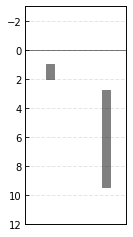

In [ ]:
import seaborn as sns
fig, (ax1) = plt.subplots(1, 1, figsize=(1.8,4), sharey=True)
ax2 = ax1.twinx()
from matplotlib import patches
# Grove et al. (2005) - reservior at 1-2 km - 
rect_G2005 = patches.Rectangle((0.5,1),0.2,1,linewidth=1,
                            edgecolor='grey',facecolor='grey')
ax1.add_patch(rect_G2005)


# Krawzinski amphibole - 2.8 to 9.5 kbar
K_2012 = patches.Rectangle((1.9,2.76),0.2,9.48-2.76,linewidth=1,
                            edgecolor='grey',facecolor='grey')

ax1.add_patch(K_2012)

# # Thurber et al., (2009) LVZ
# ax2.plot(3, 12, '*k', mfc='red', ms=15)


ax1.plot([-1, 5], [0, 0], '-k', lw=0.5)
ax1.set_ylim([P_axis_max, P_axis_min])
ax2.set_ylim([D_axis_max, D_axis_min])

ax1.tick_params(direction="in")
ax2.tick_params(direction="in")
ax1.set_xlim([0, 2.5])
ax1.set_xlabel(None)
ax1.set_ylabel(None)
ax1.set_xticks([])
#ax1.set_xticklabels(['Exp Pet', 'Exp Pet', 'MT', 'Seismics'], rotation=90)
ax1.grid(color = 'k', linestyle = '--', axis='y',linewidth = 1, alpha = 0.1, zorder=0)
ax2.set_yticks([])                 
fig.savefig('ExpPet_Shasta.png', dpi=200, bbox_inches="tight")

## Raw template for geophysics and Exp Pet

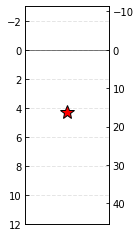

In [ ]:
import seaborn as sns
fig, (ax1) = plt.subplots(1, 1, figsize=(1.5,4), sharey=True)
ax2 = ax1.twinx()
from matplotlib import patches
elev=4.321
# # Thurber et al., (2009) LVZ - Doesnt explicitly say, but at one point, says below sea level in article, so presume all depths that way. 
ax2.plot(3, 12+elev, '*k', mfc='red', ms=15)


ax1.plot([-1, 5], [0, 0], '-k', lw=0.5)
ax1.set_ylim([P_axis_max, P_axis_min])
ax2.set_ylim([D_axis_max, D_axis_min])

ax1.tick_params(direction="in")
ax2.tick_params(direction="in")
ax1.set_xlim([2.5, 3.5])
ax1.set_xlabel(None)
ax1.set_ylabel(None)
ax1.set_xticks([])
#ax1.set_xticklabels(['Exp Pet', 'Exp Pet', 'MT', 'Seismics'], rotation=90)
ax1.grid(color = 'k', linestyle = '--', axis='y',linewidth = 1, alpha = 0.1, zorder=0)
                 
fig.savefig('Geophy_Shasta.png', dpi=200, bbox_inches="tight")

In [ ]:
## Same for amphibole

Shasta_read_Amp=pt.import_excel('Shasta.xlsx', sheet_name='Amp_All')
Shasta_Input_Amp=Shasta_read_Amp['my_input']
Shasta_Amp=Shasta_read_Amp['Amps']
Shasta_Amp['Sample_ID_Amp']=Shasta_Input_Amp["Stage"]
Shasta_Amp_copy=Shasta_Amp.copy()
Shasta_Amp_comps=pt.get_amp_sites_from_input(amp_comps=Shasta_Amp)
# Are a few outside 3.95 to 4.05 Cat sums, CaCaMgFe lies 0.3 - 0.55
Shasta_Amp_filt1=Shasta_Amp.loc[( (Shasta_Amp_comps['cation_sum_All'].between(15, 16)) )]
Shasta_Amp_class=pt.classify_phases(df=Shasta_Amp_filt1, return_end_members=True,
                        str_to_drop='_Amp')
print(Shasta_Amp_class['Phase_Min_Group_ML'].unique())
Shasta_Amp_filt=Shasta_Amp_filt1.loc[Shasta_Amp_class['Phase_Min_Group_ML']=="Amp"].reset_index(drop=True)
Shasta_Amp_Press_NoFilter=pt.calculate_amp_only_press(amp_comps=Shasta_Amp_filt, 
                        Ridolfi_Filter=False, equationP="P_Ridolfi2021")
Shasta_Amp_Press_Filter=pt.calculate_amp_only_press(amp_comps=Shasta_Amp_filt, 
                        Ridolfi_Filter=True, equationP="P_Ridolfi2021")


ValueError: Worksheet named 'Amp_All' not found

In [ ]:
len(Shasta_Amp_Press_NoFilter)

In [ ]:
plt.plot(
         (Shasta_Amp_filt['MgO_Amp']/40.3044)/(Shasta_Amp_filt['MgO_Amp']/40.3044+Shasta_Amp_filt['FeOt_Amp']/71.844),
    Shasta_Amp_Press_NoFilter['P_kbar_calc'], 'ok')

In [ ]:
Amp_Chem=pt.calculate_amp_only_melt_comps(amp_comps=Shasta_Amp_filt)

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5), sharey=True)
ax1.plot(
         Amp_Chem['MgO_Eq9_Zhang17'],
    Shasta_Amp_Press_NoFilter['P_kbar_calc'], 'ok')
ax1.set_xlabel('Calculated MgO Zhang')
ax1.set_ylabel('Calcated P Ridolfi 21')

ax2.set_xlabel('Calculated SiO2 Zhang')
ax2.set_ylabel('Calcated P Ridolfi 21')

ax2.plot(
         Amp_Chem['SiO2_Eq1_Zhang17'],
    Shasta_Amp_Press_NoFilter['P_kbar_calc'], 'ok')

In [ ]:
#None Filtered
Shasta_Amp_Press_All=Shasta_Amp_Press_NoFilter.copy()
Shasta_Amp_Press_All['Preferred_P']=Shasta_Amp_Press_All['P_kbar_calc']
Shasta_Amp_Press_All['Model']="Ridolfi not filtered"
Shasta_Amp_Press_All['Sample_ID_Amp']="Shasta domefield"

Shasta_Amp_Press_Filt=Shasta_Amp_Press_Filter.copy()
Shasta_Amp_Press_Filt['Preferred_P']=Shasta_Amp_Press_Filt['P_kbar_calc']
Shasta_Amp_Press_Filt['Model']="Ridolfi filtered"
Shasta_Amp_Press_Filt['Sample_ID_Amp']="Shasta domefield"

Combo_Amp=pd.concat([Shasta_Amp_Press_All, Shasta_Amp_Press_Filt], axis=0)

In [ ]:
import pickle
Combo_Amp.to_pickle("Amp_Shasta.pkl")

In [ ]:
Shasta_Amp_Press_All['Sample_ID_Amp']

In [ ]:
import seaborn as sns
fig, (ax1) = plt.subplots(1, 1, figsize=(5*0.6,4), sharey=True)
ax2 = ax1.twinx()

volc_order=["HMA", "Shasta domefield"]
sns.violinplot(x="Sample_ID_Amp", y="Preferred_P",  cut=0, 
               linewidth=1,hue="Model", inner=None,
            data=Combo_Amp, split=True, ax=ax1, width=0.9, order=volc_order, stick=True
              , palette=['lightgreen', 'grey'])

# ax1.plot(-0.1+0*Combo_Amp['Preferred_P'].loc[(Combo_Amp['Model']=="Ridolfi not filtered")
#                                         &(Combo_Amp["Stage"]=="HMA")],
#       Combo_Amp['Preferred_P'].loc[(Combo_Amp['Model']=="Ridolfi not filtered")
#                                         &(Combo_Amp["Stage"]=="HMA")],  
#          'xb')

# ax1.plot(0.1+0*Combo_Amp['Preferred_P'].loc[(Combo_Amp['Model']=="Ridolfi filtered")
#                                         &(Combo_Amp["Stage"]=="HMA")],
#       Combo_Amp['Preferred_P'].loc[(Combo_Amp['Model']=="Ridolfi filtered")
#                                         &(Combo_Amp["Stage"]=="HMA")],  
#          'xr')

# ax1.plot(-0.1,
#       np.nanmedian(Combo_Amp['Preferred_P'].loc[(Combo_Amp['Model']=="Ridolfi not filtered")
#                                         &(Combo_Amp["Stage"]=="HMA")]),  
#          '*k', mfc='w', ms=20)

# ax1.plot(0.1,
#       np.nanmedian(Combo_Amp['Preferred_P'].loc[(Combo_Amp['Model']=="Ridolfi filtered")
#                                         &(Combo_Amp["Stage"]=="HMA")]),  
#          '*k', mfc='w', ms=20)

ax1.plot(0.9+0*Combo_Amp['Preferred_P'].loc[(Combo_Amp['Model']=="Ridolfi not filtered")
                                        &(Combo_Amp["Sample_ID_Amp"]=="Shasta domefield")],
      Combo_Amp['Preferred_P'].loc[(Combo_Amp['Model']=="Ridolfi not filtered")
                                        &(Combo_Amp["Sample_ID_Amp"]=="Shasta domefield")],  
         'x', mec='green')

ax1.plot(1.1+0*Combo_Amp['Preferred_P'].loc[(Combo_Amp['Model']=="Ridolfi filtered")
                                        &(Combo_Amp["Sample_ID_Amp"]=="Shasta domefield")],
      Combo_Amp['Preferred_P'].loc[(Combo_Amp['Model']=="Ridolfi filtered")
                                        &(Combo_Amp["Sample_ID_Amp"]=="Shasta domefield")],  
         'x', mec='k')

ax1.plot(0.9,
      np.nanmedian(Combo_Amp['Preferred_P'].loc[(Combo_Amp['Model']=="Ridolfi not filtered")
                                        &(Combo_Amp["Sample_ID_Amp"]=="Shasta domefield")]),  
         '*k', mfc='w', ms=20)

ax1.plot(1.1,
      np.nanmedian(Combo_Amp['Preferred_P'].loc[(Combo_Amp['Model']=="Ridolfi filtered")
                                        &(Combo_Amp["Sample_ID_Amp"]=="Shasta domefield")]),  
         '*k', mfc='w', ms=20)

ax1.plot([-1, 5], [0, 0], '-k', lw=0.5)
ax1.set_ylim([P_axis_max, P_axis_min])
ax2.set_ylim([D_axis_max, D_axis_min])
ax1.set_xlim([0.5, 1.5])
ax1.get_legend().remove()
ax1.set_xlabel(None)
ax1.set_ylabel(None)

ax1.tick_params(direction="in")
ax2.tick_params(direction="in")
ax2.set_yticks([])
# ax1.set_yticks([])
ax1.grid(color = 'k', linestyle = '--', axis='y',linewidth = 1, alpha = 0.1, zorder=0)


fig.savefig('Shasta_Amp.png', dpi=200)



In [ ]:
Shasta_Amp_Press_Filter

In [ ]:
plt.plot(1.1,
      np.nanmedian(Combo_Amp['Preferred_P'].loc[(Combo_Amp['Model']=="Ridolfi filtered")
                                        &(Combo_Amp["Sample_ID_Amp"]=="Shasta domefield")]),  
         '*k', mfc='w', ms=20)

In [ ]:
Combo_Amp["Sample_ID_Amp"]

In [ ]:
Combo_Amp['Preferred_P'].loc[(Combo_Amp['Model']=="Ridolfi filtered")
                                        &(Combo_Amp["Sample_ID_Amp"]=="Shasta domefield")]